In [252]:
import pandas as pd
import numpy as np
from ast import literal_eval
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [253]:
pd.set_option('display.max_columns', None)


In [254]:
pd.set_option("display.max_colwidth", None)

In [255]:
pd.set_option("display.max_rows", None)

In [256]:
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

In [257]:
ruta_alquiler = "C:\\Users\\LENOVO\\Desktop\\Jacobo\\DATOS PISOS\\PROYECTO FINAL\\datos_alquiler.csv"
datos_alquiler = pd.read_csv(ruta_alquiler, encoding='utf-8', sep=None, engine='python' )
datos_alquiler.head()

,precio,m2,habitaciones,baños,terraza,estado,armarios,calefaccion,garaje,trastero,aire acondicionado,vivienda,ciudad,distrito,barrio
0,1300,47,1,1,0,Segunda mano/buen estado,1,0,0,0,0,piso,Madrid,Centro,Lavapiés-Embajadores
1,1350,60,1,1,0,Segunda mano/buen estado,1,1,0,0,0,piso,Madrid,Centro,Malasaña-Universidad
2,2000,98,3,1,0,Segunda mano/buen estado,0,0,0,0,0,piso,Madrid,Centro,Palacio
3,1580,50,1,1,0,Segunda mano/buen estado,1,1,0,0,0,piso,Madrid,Centro,Sol
4,1850,85,3,1,0,Segunda mano/buen estado,1,0,0,0,0,piso,Madrid,Centro,Lavapiés-Embajadores


datos_alquiler_r = datos_alquiler[
    (datos_alquiler["vivienda"] == "piso") &
    (datos_alquiler["ciudad"] == "Madrid")
]

In [258]:
datos_alquiler_r = datos_alquiler[
    (datos_alquiler["vivienda"] == "piso")
]

In [259]:
ruta_compra = "C:\\Users\\LENOVO\\Desktop\\Jacobo\\DATOS PISOS\\PROYECTO FINAL\\datos_compra.csv"
datos_compra = pd.read_csv(ruta_compra, encoding='utf-8', sep=None, engine='python' )
datos_compra.head()

,precio,m2,habitaciones,baños,estado,armarios_empotrados,aire_acondicionado,barrio,distrito,ciudad,Ascensor,EXT-INT,vivienda,precio_m2,tipo_vivienda,Planta_num,barrio_encoded,estado_encoded,EXT-INT_encoded,Ascensor_encoded
0,1690000,145.00,2.00,2.00,Segunda mano/buen estado,True,True,Sol,Centro,Madrid capital,NaN,NaN,Piso,"11,655.17",Piso,NaN,57,0,2,2
1,895000,106.00,2.00,NaN,Segunda mano/buen estado,True,True,Palacio,Centro,Madrid capital,Si,Exterior,Ático,"8,443.40",Piso,4.00,50,0,0,1
2,1495000,164.00,3.00,3.00,Segunda mano/buen estado,False,True,Palacio,Centro,Madrid capital,Si,Exterior,Piso,"9,115.85",Piso,2.00,50,0,0,1
3,723000,123.00,5.00,2.00,Segunda mano/buen estado,True,True,Lavapiés-Embajadores,Centro,Madrid capital,No,Exterior,Piso,"5,878.05",Piso,2.00,38,0,0,0
4,2450000,166.00,2.00,2.00,Segunda mano/buen estado,True,True,Chueca-Justicia,Centro,Madrid capital,Si,Exterior,Piso,"14,759.04",Piso,2.00,12,0,0,1


In [260]:
datos_compra["ciudad"].unique()

array(['Madrid capital', 'Zona noroeste', 'Zona norte'], dtype=object)

datos_compra_r = datos_compra[
    (datos_compra["tipo_vivienda"] == "Piso") &
    (datos_compra["ciudad"] == "Madrid capital")
]

In [261]:
datos_compra_r = datos_compra[
    (datos_compra["tipo_vivienda"] == "Piso")
]

In [262]:
# 2. Normalizar nombres
datos_alquiler_r.rename(columns=lambda x: x.lower().strip(), inplace=True)
datos_compra_r.rename(columns=lambda x: x.lower().strip(), inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3020\270414663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_alquiler_r.rename(columns=lambda x: x.lower().strip(), inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3020\270414663.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_compra_r.rename(columns=lambda x: x.lower().strip(), inplace=True)


In [263]:
datos_alquiler_r["m2"] = pd.to_numeric(datos_alquiler_r["m2"], errors="coerce")
datos_compra_r["m2"]   = pd.to_numeric(datos_compra_r["m2"], errors="coerce")

# 2. Función robusta para categorizar
def categorizar_m2(m):
    if pd.isna(m):
        return "Desconocido"
    rango = (int(m) // 20) * 20
    return f"{rango}-{rango+20} m²"

# 3. Crear las categorías
datos_alquiler_r["rango_m2"] = datos_alquiler_r["m2"].apply(categorizar_m2)
datos_compra_r["rango_m2"]   = datos_compra_r["m2"].apply(categorizar_m2)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3020\4100152824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_alquiler_r["m2"] = pd.to_numeric(datos_alquiler_r["m2"], errors="coerce")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3020\4100152824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_compra_r["m2"]   = pd.to_numeric(datos_compra_r["m2"], errors="coerce")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3020\4100152824.py:12: SettingWithCopyWarning: 
A value is trying to be set on a co

In [264]:
datos_compra_r.head(3)

,precio,m2,habitaciones,baños,estado,armarios_empotrados,aire_acondicionado,barrio,distrito,ciudad,ascensor,ext-int,vivienda,precio_m2,tipo_vivienda,planta_num,barrio_encoded,estado_encoded,ext-int_encoded,ascensor_encoded,rango_m2
0,1690000,145.00,2.00,2.00,Segunda mano/buen estado,True,True,Sol,Centro,Madrid capital,NaN,NaN,Piso,"11,655.17",Piso,NaN,57,0,2,2,140-160 m²
1,895000,106.00,2.00,NaN,Segunda mano/buen estado,True,True,Palacio,Centro,Madrid capital,Si,Exterior,Ático,"8,443.40",Piso,4.00,50,0,0,1,100-120 m²
2,1495000,164.00,3.00,3.00,Segunda mano/buen estado,False,True,Palacio,Centro,Madrid capital,Si,Exterior,Piso,"9,115.85",Piso,2.00,50,0,0,1,160-180 m²


In [265]:
datos_alquiler_r["barrio"].unique()

array(['Lavapiés-Embajadores', 'Malasaña-Universidad', 'Palacio', 'Sol',
       'Huertas-Cortes', 'Chueca-Justicia', 'Ciudad Jardín', 'El Viso',
       'Nueva España', 'Prosperidad', 'Bernabéu-Hispanoamérica',
       'Castilla', 'Nuevos Ministerios-Ríos Rosas', 'Vallehermoso',
       'Gaztambide', 'Arapiles', 'Trafalgar', 'Almagro', 'del Plantio',
       nan, 'los valles', 'AVENIDA JUAB¡N CARLOS I', 'Rosalía de Castro',
       'Moreras', 'Los Porches', 'Profesor Carlos Toleda', '-46',
       'DEL MONTE', 'Parque Golf', 'y zonas ajardinadas.',
       'Doctor Pérez Gallardo', 'Edificio Centro Colón',
       'de Hernán Cortés', 'Señorio de la Ermita', 'Valdemarín',
       'Valdezarza', 'Aravaca', 'Ciudad Universitaria', 'Argüelles',
       'Casa de Campo', 'El Plantío', 'Zona Avenida Europa', 'La Finca',
       'Zona Pueblo', 'Somosaguas', 'Prado de Somosaguas', 'La Cabaña',
       'Zona norte', 'Pacífico', 'Estrella', 'Ibiza', 'Adelfas',
       'Niño Jesús', 'Jerónimos', 'El Burgo', 'El 

In [266]:
datos_alquiler_r.head(3)

,precio,m2,habitaciones,baños,terraza,estado,armarios,calefaccion,garaje,trastero,aire acondicionado,vivienda,ciudad,distrito,barrio,rango_m2
0,1300,47,1,1,0,Segunda mano/buen estado,1,0,0,0,0,piso,Madrid,Centro,Lavapiés-Embajadores,40-60 m²
1,1350,60,1,1,0,Segunda mano/buen estado,1,1,0,0,0,piso,Madrid,Centro,Malasaña-Universidad,60-80 m²
2,2000,98,3,1,0,Segunda mano/buen estado,0,0,0,0,0,piso,Madrid,Centro,Palacio,80-100 m²


In [267]:
datos_compra_r["barrio"].unique()

array(['Sol', 'Palacio', 'Lavapiés-Embajadores', 'Chueca-Justicia',
       'Malasaña-Universidad', 'Huertas-Cortes', 'Nueva España',
       'El Viso', 'Bernabéu-Hispanoamérica', 'Prosperidad', 'Castilla',
       'Ciudad Jardín', 'Gaztambide', 'Almagro',
       'Nuevos Ministerios-Ríos Rosas', 'Trafalgar', 'Arapiles',
       'Vallehermoso', nan, 'Aravaca', 'Argüelles',
       'Ciudad Universitaria', 'Valdezarza', 'Valdemarín',
       'Casa de Campo', 'El Plantío', 'La Finca', 'Somosaguas',
       'Zona Avenida Europa', 'Zona norte', 'Zona Pueblo',
       'Zona Estación', 'Prado de Somosaguas', 'La Cabaña', 'Adelfas',
       'Ibiza', 'Jerónimos', 'Estrella', 'Pacífico', 'Niño Jesús',
       'Montecillo', 'Yucatán- Las Cornisas', 'El Cantizal', 'Europolis',
       'El Pinar- Punta Galea', 'Marazuela- El Torreón',
       'Parque Empresarial', 'Alto de la Jabonería',
       'Las Matas- Peñascales', 'El Caño- Maracaibo', 'Zona Auditorio',
       'Casco Antiguo', 'El Burgo', 'La Cañadilla', '

In [268]:
alquiler_group = (
    datos_alquiler_r.groupby(["barrio", "distrito","habitaciones","baños","rango_m2"])["precio"]
    .mean()
    .reset_index(name="alquiler_medio")
)

compra_group = (
    datos_compra_r.groupby(["barrio","distrito","habitaciones","baños","rango_m2"])["precio"]
    .mean()
    .reset_index(name="compra_media")
)


In [269]:
rentabilidad = pd.merge(compra_group, alquiler_group,
                        on=["barrio","distrito","habitaciones","baños","rango_m2"],
                        how="inner")

In [270]:
rentabilidad["rentabilidad_bruta_%"] = (
    rentabilidad["alquiler_medio"] * 12 / rentabilidad["compra_media"]
) * 100

                            barrio  distrito  habitaciones  baños    rango_m2  \
143              Cuzco-Castillejos    Tetuán          2.00   2.00  140-160 m²   
327                        Palacio    Centro          4.00   4.00  120-140 m²   
346                            Sol    Centro          2.00   3.00   80-100 m²   
267           Malasaña-Universidad    Centro          6.00   3.00  140-160 m²   
66                   Bellas Vistas    Tetuán          2.00   2.00    40-60 m²   
37                         Aravaca   Moncloa          2.00   2.00    60-80 m²   
265           Malasaña-Universidad    Centro          4.00   2.00  140-160 m²   
398              Ventilla-Almenara    Tetuán          3.00   2.00   80-100 m²   
1                          Adelfas    Retiro          2.00   2.00    40-60 m²   
228                      Jerónimos    Retiro          3.00   2.00    60-80 m²   
365                      Trafalgar  Chamberí          3.00   2.00   80-100 m²   
85                      Berr

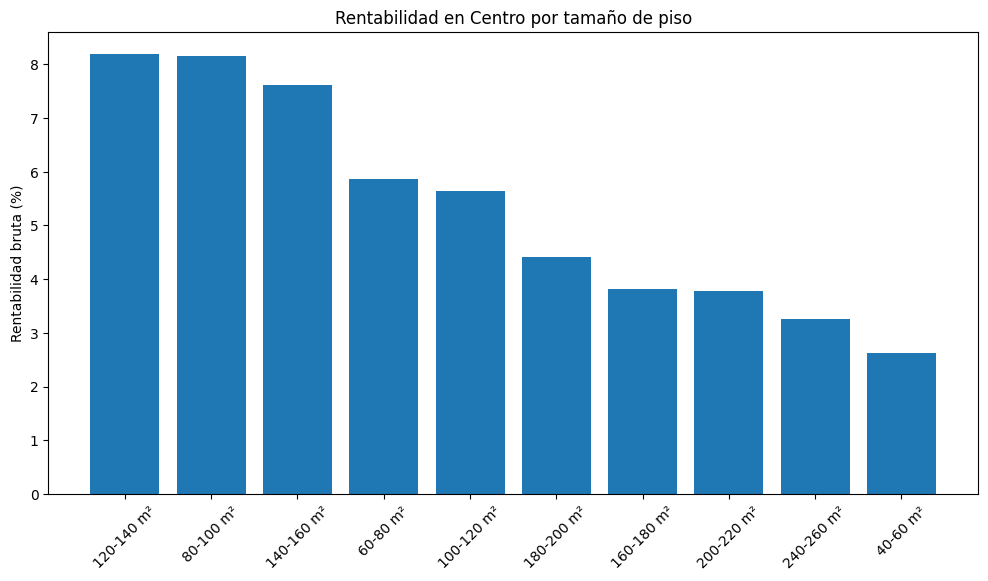

In [271]:
rentabilidad = rentabilidad.sort_values(by="rentabilidad_bruta_%", ascending=False)

# 8. Mostrar tabla
print(rentabilidad.head(20))  # ver top 20 más rentables

# 9. Ejemplo de gráfico para un distrito concreto
distrito_ejemplo = "Centro"
df_plot = rentabilidad[rentabilidad["distrito"] == distrito_ejemplo]

plt.figure(figsize=(12,6))
plt.bar(df_plot["rango_m2"], df_plot["rentabilidad_bruta_%"])
plt.xticks(rotation=45)
plt.ylabel("Rentabilidad bruta (%)")
plt.title(f"Rentabilidad en {distrito_ejemplo} por tamaño de piso")
plt.show()

In [272]:
df_plot = df_plot.sort_values(by="rentabilidad_bruta_%", ascending=True)

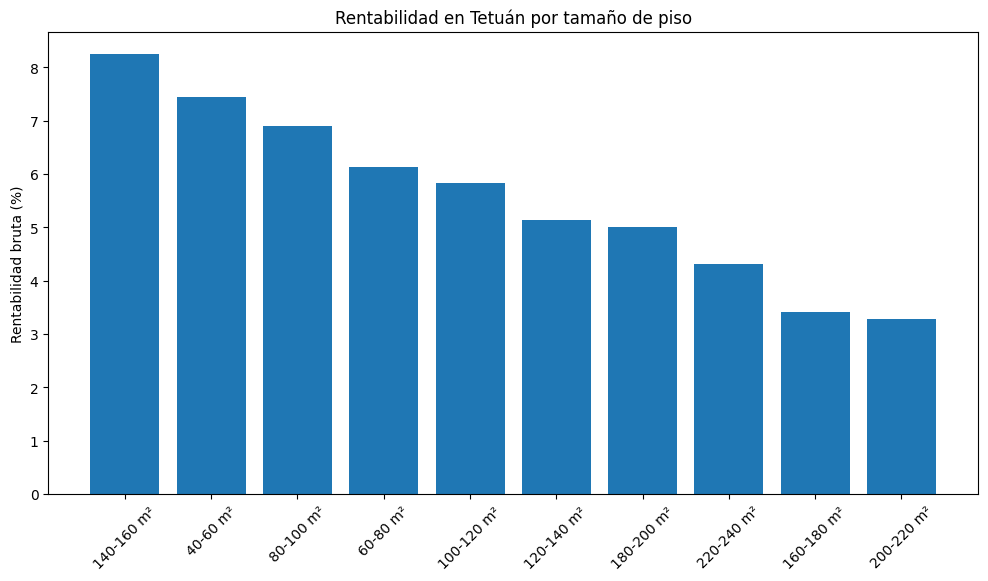

                barrio distrito  habitaciones  baños    rango_m2  \
143  Cuzco-Castillejos   Tetuán          2.00   2.00  140-160 m²   
66       Bellas Vistas   Tetuán          2.00   2.00    40-60 m²   
398  Ventilla-Almenara   Tetuán          3.00   2.00   80-100 m²   
85          Berruguete   Tetuán          2.00   2.00   80-100 m²   
370      Valdeacederas   Tetuán          2.00   2.00  140-160 m²   
375      Valdeacederas   Tetuán          3.00   2.00   80-100 m²   
394  Ventilla-Almenara   Tetuán          2.00   2.00    60-80 m²   
67       Bellas Vistas   Tetuán          2.00   2.00    60-80 m²   
369      Valdeacederas   Tetuán          2.00   2.00  100-120 m²   
144  Cuzco-Castillejos   Tetuán          2.00   2.00    60-80 m²   

     compra_media  alquiler_medio  rentabilidad_bruta_%  
143    509,000.00        3,500.00                  8.25  
66     255,000.00        1,583.33                  7.45  
398    495,000.00        2,850.00                  6.91  
85     391,800.00  

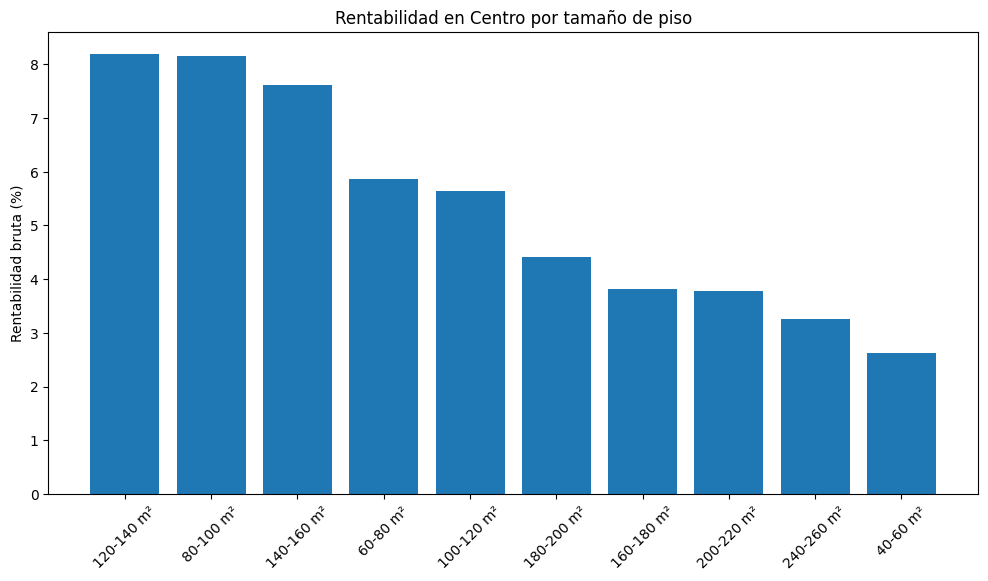

                   barrio distrito  habitaciones  baños    rango_m2  \
327               Palacio   Centro          4.00   4.00  120-140 m²   
346                   Sol   Centro          2.00   3.00   80-100 m²   
267  Malasaña-Universidad   Centro          6.00   3.00  140-160 m²   
265  Malasaña-Universidad   Centro          4.00   2.00  140-160 m²   
246  Lavapiés-Embajadores   Centro          3.00   3.00  140-160 m²   
260  Malasaña-Universidad   Centro          3.00   2.00  120-140 m²   
104       Chueca-Justicia   Centro          2.00   2.00    60-80 m²   
319               Palacio   Centro          2.00   2.00    60-80 m²   
203        Huertas-Cortes   Centro          3.00   3.00  100-120 m²   
106       Chueca-Justicia   Centro          2.00   3.00  120-140 m²   

     compra_media  alquiler_medio  rentabilidad_bruta_%  
327    725,000.00        4,950.00                  8.19  
346    530,000.00        3,600.00                  8.15  
267    850,000.00        5,400.00           

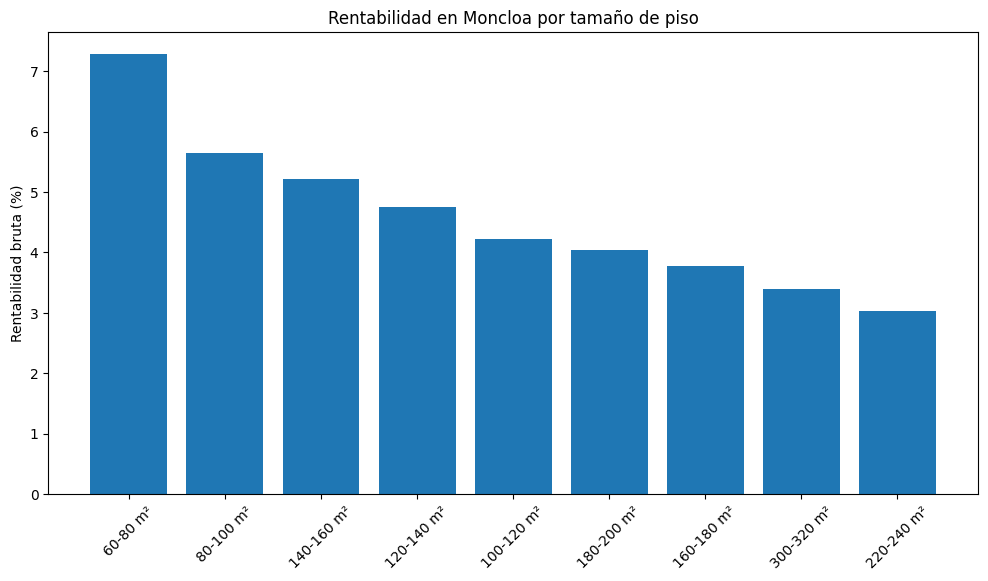

                   barrio distrito  habitaciones  baños    rango_m2  \
37                Aravaca  Moncloa          2.00   2.00    60-80 m²   
88          Casa de Campo  Moncloa          2.00   2.00    60-80 m²   
121  Ciudad Universitaria  Moncloa          2.00   2.00   80-100 m²   
39                Aravaca  Moncloa          2.00   3.00  140-160 m²   
48              Argüelles  Moncloa          2.00   2.00   80-100 m²   
60              Argüelles  Moncloa          4.00   2.00  120-140 m²   
45              Argüelles  Moncloa          2.00   2.00  120-140 m²   
54              Argüelles  Moncloa          3.00   2.00   80-100 m²   
380            Valdezarza  Moncloa          3.00   2.00   80-100 m²   
53              Argüelles  Moncloa          3.00   2.00    60-80 m²   

     compra_media  alquiler_medio  rentabilidad_bruta_%  
37     280,000.00        1,700.00                  7.29  
88     300,000.00        1,600.00                  6.40  
121    530,000.00        2,495.00           

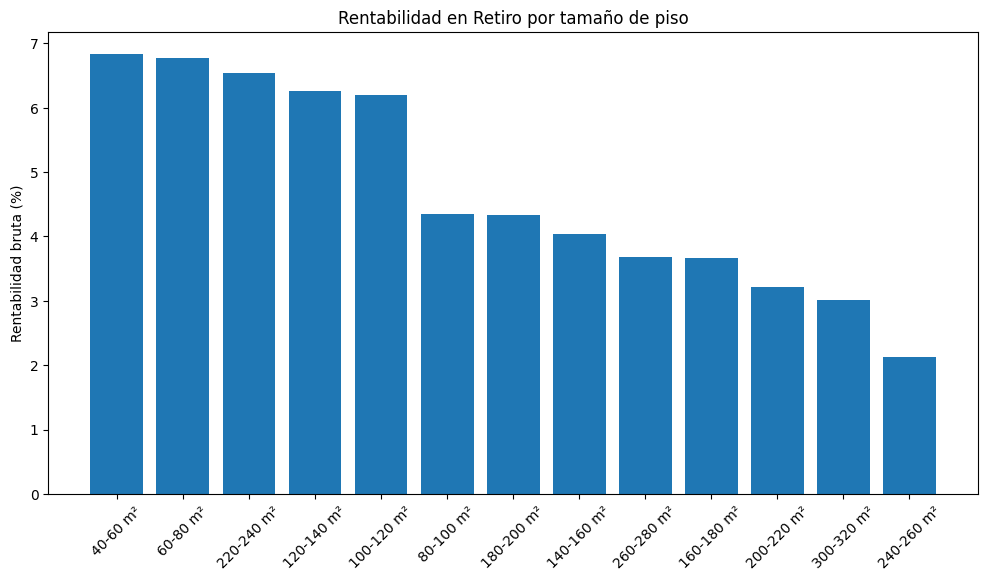

        barrio distrito  habitaciones  baños    rango_m2  compra_media  \
1      Adelfas   Retiro          2.00   2.00    40-60 m²    316,000.00   
228  Jerónimos   Retiro          3.00   2.00    60-80 m²    620,000.00   
231  Jerónimos   Retiro          4.00   4.00  220-240 m²  2,600,000.00   
4      Adelfas   Retiro          4.00   2.00  120-140 m²    789,000.00   
214      Ibiza   Retiro          3.00   3.00  100-120 m²    966,166.67   
210      Ibiza   Retiro          2.00   3.00  120-140 m²  1,100,000.00   
220  Jerónimos   Retiro          2.00   2.00  100-120 m²    785,000.00   
308   Pacífico   Retiro          2.00   2.00    60-80 m²    544,500.00   
213      Ibiza   Retiro          3.00   2.00   80-100 m²    786,727.27   
222  Jerónimos   Retiro          2.00   2.00  180-200 m²  1,800,000.00   

     alquiler_medio  rentabilidad_bruta_%  
1          1,800.00                  6.84  
228        3,500.00                  6.77  
231       14,160.00                  6.54  
4        

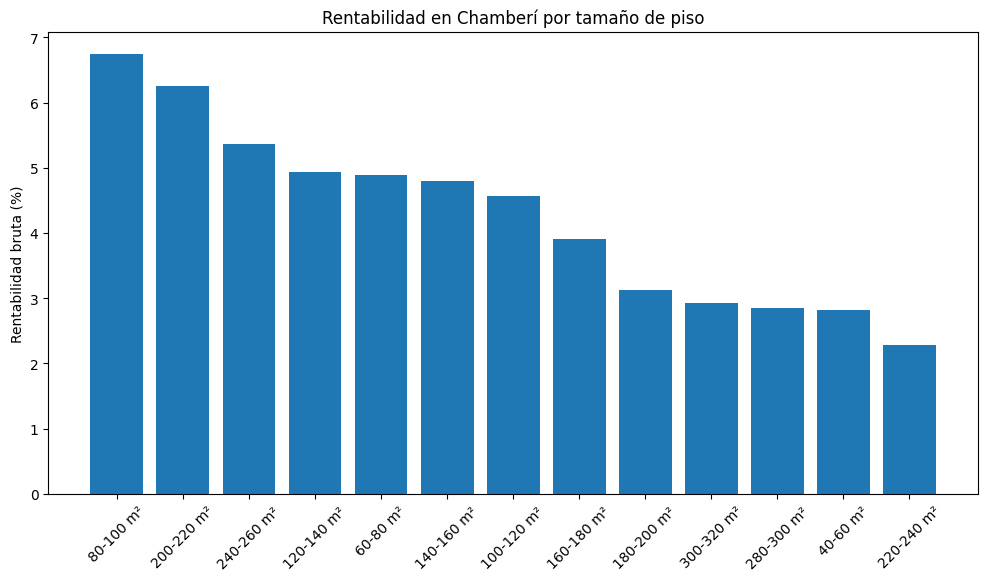

                            barrio  distrito  habitaciones  baños    rango_m2  \
365                      Trafalgar  Chamberí          3.00   2.00   80-100 m²   
304  Nuevos Ministerios-Ríos Rosas  Chamberí          4.00   2.00  200-220 m²   
306  Nuevos Ministerios-Ríos Rosas  Chamberí          4.00   3.00  200-220 m²   
20                         Almagro  Chamberí          3.00   3.00  240-260 m²   
299  Nuevos Ministerios-Ríos Rosas  Chamberí          3.00   3.00  120-140 m²   
356                      Trafalgar  Chamberí          2.00   2.00    60-80 m²   
33                        Arapiles  Chamberí          3.00   2.00  140-160 m²   
382                   Vallehermoso  Chamberí          2.00   2.00    60-80 m²   
192                     Gaztambide  Chamberí          5.00   3.00  140-160 m²   
360                      Trafalgar  Chamberí          3.00   2.00  100-120 m²   

     compra_media  alquiler_medio  rentabilidad_bruta_%  
365    680,000.00        3,823.33                 

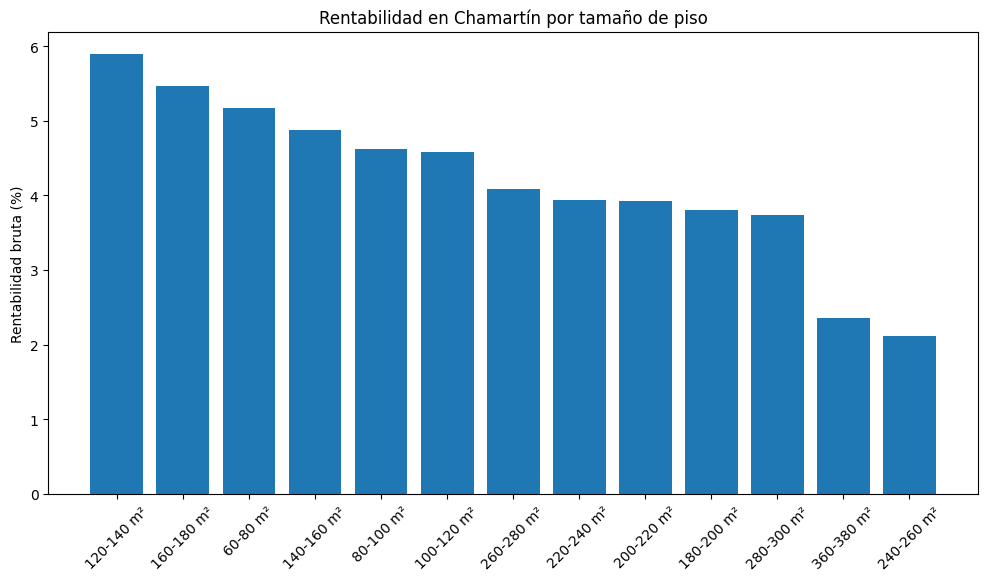

                      barrio   distrito  habitaciones  baños    rango_m2  \
164                  El Viso  Chamartín          3.00   2.00  120-140 m²   
81   Bernabéu-Hispanoamérica  Chamartín          4.00   3.00  160-180 m²   
93                  Castilla  Chamartín          2.00   2.00    60-80 m²   
170                  El Viso  Chamartín          4.00   2.00  120-140 m²   
80   Bernabéu-Hispanoamérica  Chamartín          3.00   3.00  140-160 m²   
113            Ciudad Jardín  Chamartín          2.00   2.00    60-80 m²   
339              Prosperidad  Chamartín          3.00   2.00   80-100 m²   
74   Bernabéu-Hispanoamérica  Chamartín          2.00   2.00   80-100 m²   
75   Bernabéu-Hispanoamérica  Chamartín          3.00   2.00  100-120 m²   
338              Prosperidad  Chamartín          3.00   2.00  100-120 m²   

     compra_media  alquiler_medio  rentabilidad_bruta_%  
164    816,000.00        4,010.00                  5.90  
81   1,185,000.00        5,400.00              

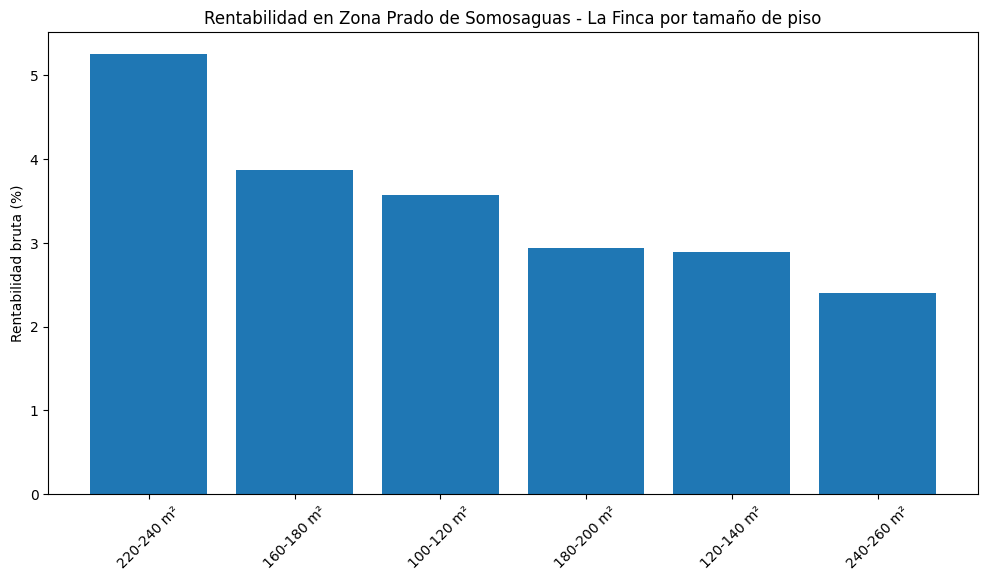

                  barrio                             distrito  habitaciones  \
332  Prado de Somosaguas  Zona Prado de Somosaguas - La Finca          3.00   
333  Prado de Somosaguas  Zona Prado de Somosaguas - La Finca          4.00   
331  Prado de Somosaguas  Zona Prado de Somosaguas - La Finca          3.00   
237             La Finca  Zona Prado de Somosaguas - La Finca          4.00   
329  Prado de Somosaguas  Zona Prado de Somosaguas - La Finca          2.00   
236             La Finca  Zona Prado de Somosaguas - La Finca          4.00   
330  Prado de Somosaguas  Zona Prado de Somosaguas - La Finca          3.00   
334  Prado de Somosaguas  Zona Prado de Somosaguas - La Finca          5.00   
238             La Finca  Zona Prado de Somosaguas - La Finca          4.00   

     baños    rango_m2  compra_media  alquiler_medio  rentabilidad_bruta_%  
332   3.00  220-240 m²    799,000.00        3,500.00                  5.26  
333   4.00  220-240 m²  1,040,000.00        3,700.00   

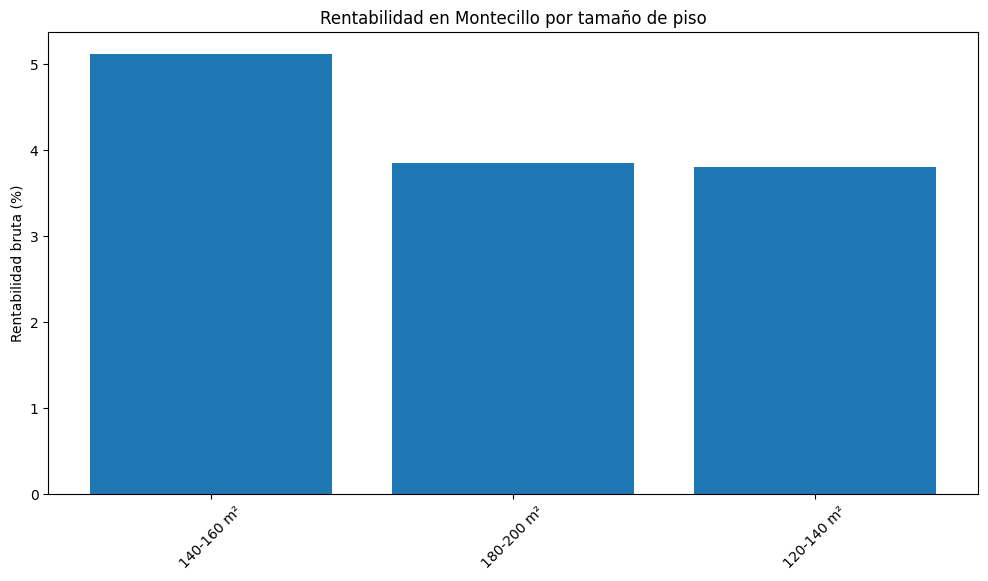

         barrio    distrito  habitaciones  baños    rango_m2  compra_media  \
271  Montecillo  Montecillo          3.00   2.00  140-160 m²    562,500.00   
272  Montecillo  Montecillo          3.00   2.00  180-200 m²    653,333.33   
270  Montecillo  Montecillo          3.00   2.00  120-140 m²    615,000.00   
269  Montecillo  Montecillo          2.00   2.00  120-140 m²    510,000.00   

     alquiler_medio  rentabilidad_bruta_%  
271        2,400.00                  5.12  
272        2,100.00                  3.86  
270        1,950.00                  3.80  
269        1,550.00                  3.65  


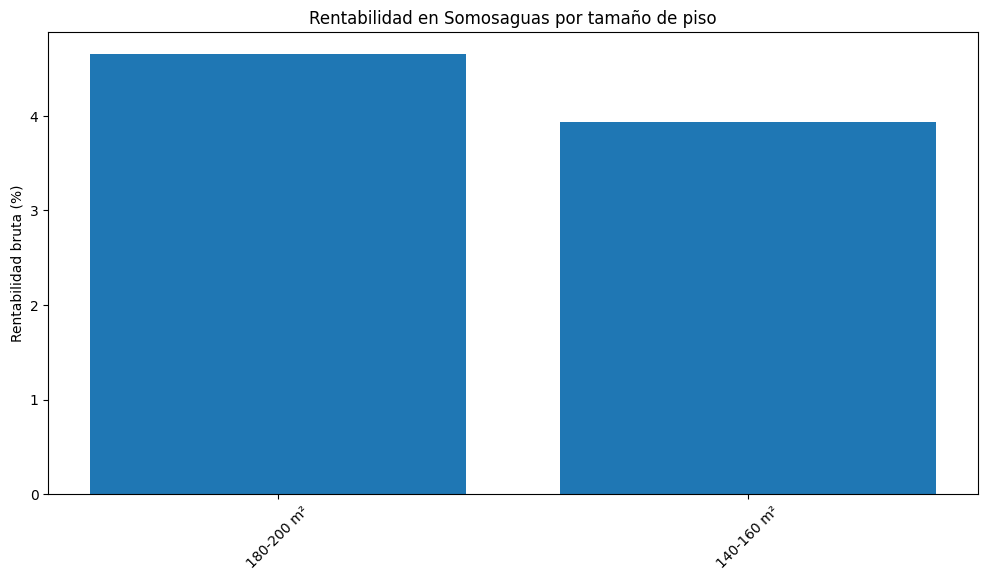

         barrio    distrito  habitaciones  baños    rango_m2  compra_media  \
353  Somosaguas  Somosaguas          4.00   3.00  180-200 m²  1,287,500.00   
351  Somosaguas  Somosaguas          3.00   2.00  140-160 m²    732,500.00   
352  Somosaguas  Somosaguas          3.00   2.00  180-200 m²    852,500.00   

     alquiler_medio  rentabilidad_bruta_%  
353        4,995.00                  4.66  
351        2,400.00                  3.93  
352        2,100.00                  2.96  


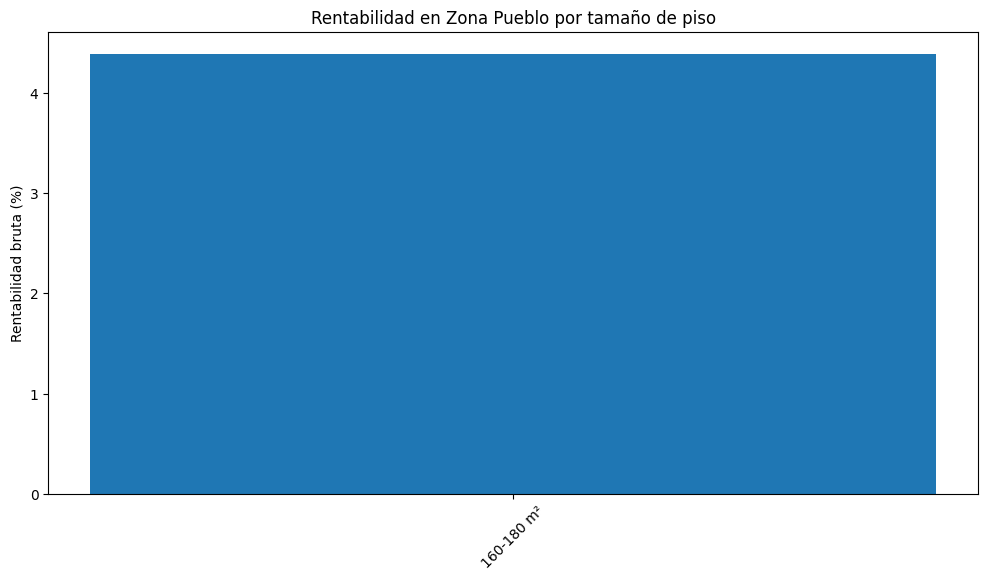

          barrio     distrito  habitaciones  baños    rango_m2  compra_media  \
408  Zona Pueblo  Zona Pueblo          4.00   3.00  160-180 m²    629,000.00   

     alquiler_medio  rentabilidad_bruta_%  
408        2,300.00                  4.39  


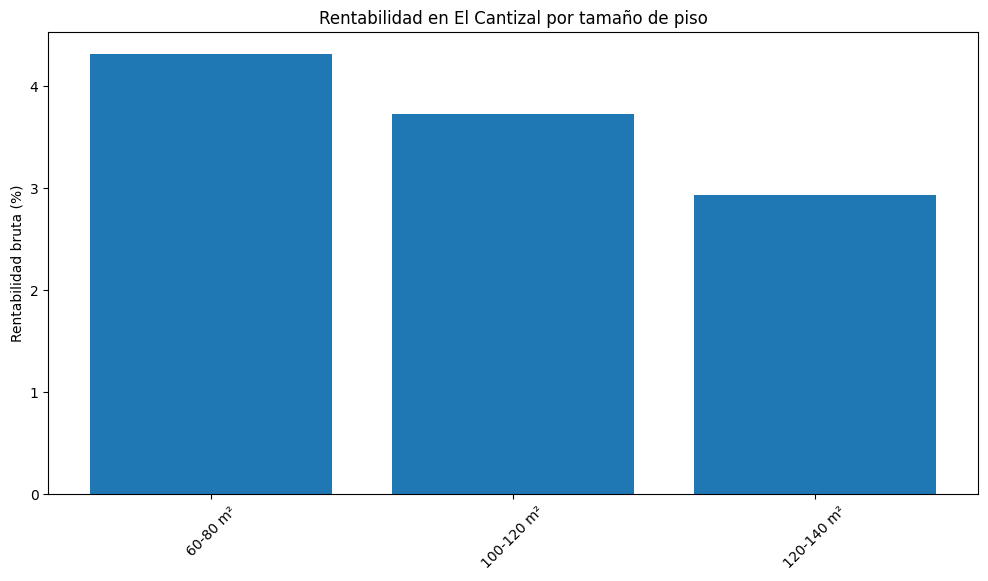

          barrio     distrito  habitaciones  baños    rango_m2  compra_media  \
155  El Cantizal  El Cantizal          2.00   2.00    60-80 m²    445,000.00   
154  El Cantizal  El Cantizal          2.00   2.00  100-120 m²    547,500.00   
156  El Cantizal  El Cantizal          3.00   2.00  100-120 m²    539,999.00   
157  El Cantizal  El Cantizal          3.00   2.00  120-140 m²    695,749.00   

     alquiler_medio  rentabilidad_bruta_%  
155        1,600.00                  4.31  
154        1,700.00                  3.73  
156        1,675.00                  3.72  
157        1,700.00                  2.93  


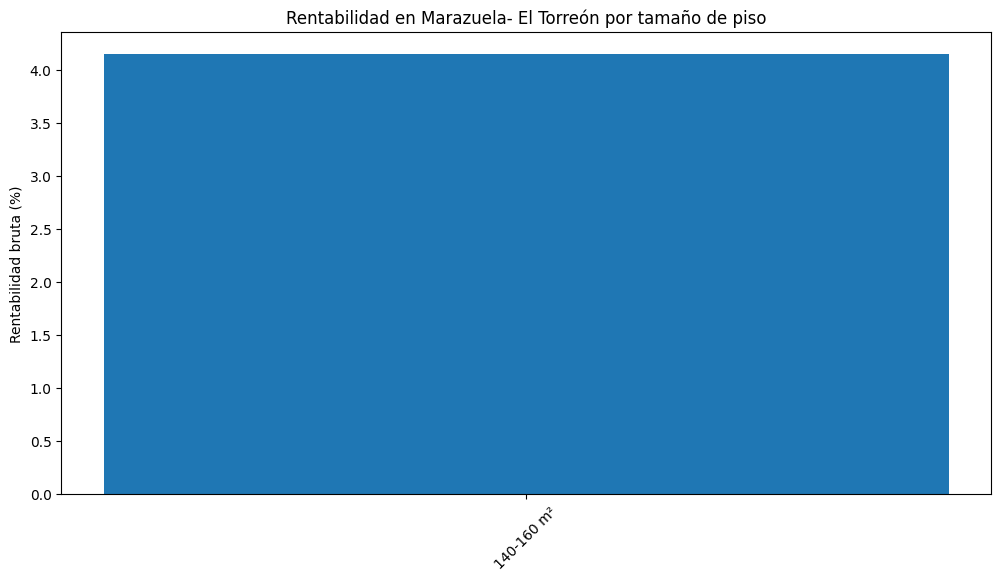

                    barrio               distrito  habitaciones  baños  \
268  Marazuela- El Torreón  Marazuela- El Torreón          3.00   2.00   

       rango_m2  compra_media  alquiler_medio  rentabilidad_bruta_%  
268  140-160 m²    722,500.00        2,500.00                  4.15  


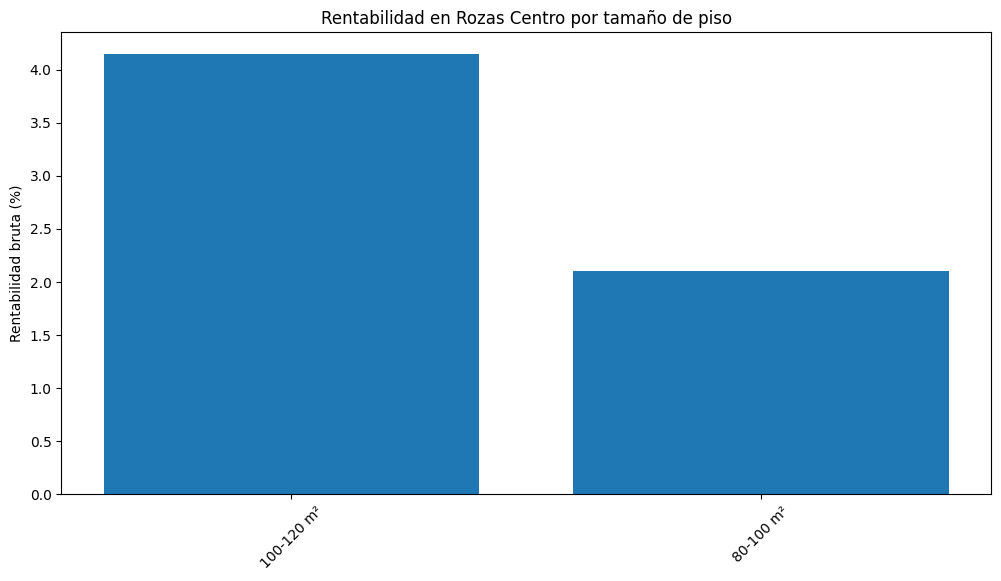

             barrio      distrito  habitaciones  baños    rango_m2  \
91    Casco Antiguo  Rozas Centro          3.00   2.00  100-120 m²   
405  Zona Auditorio  Rozas Centro          2.00   2.00   80-100 m²   

     compra_media  alquiler_medio  rentabilidad_bruta_%  
91     550,000.00        1,900.00                  4.15  
405    750,000.00        1,312.50                  2.10  


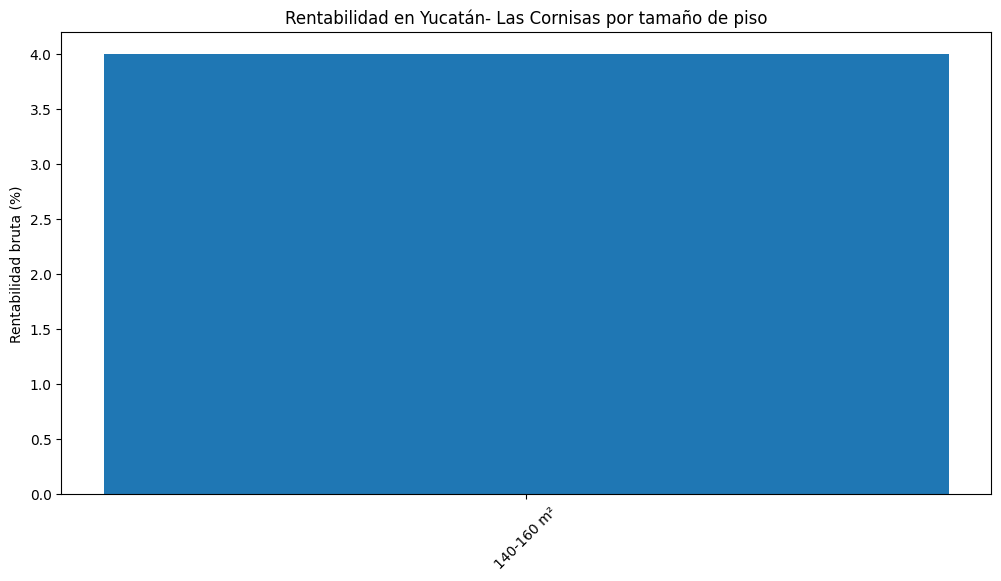

                    barrio               distrito  habitaciones  baños  \
404  Yucatán- Las Cornisas  Yucatán- Las Cornisas          3.00   2.00   

       rango_m2  compra_media  alquiler_medio  rentabilidad_bruta_%  
404  140-160 m²    630,000.00        2,100.00                  4.00  


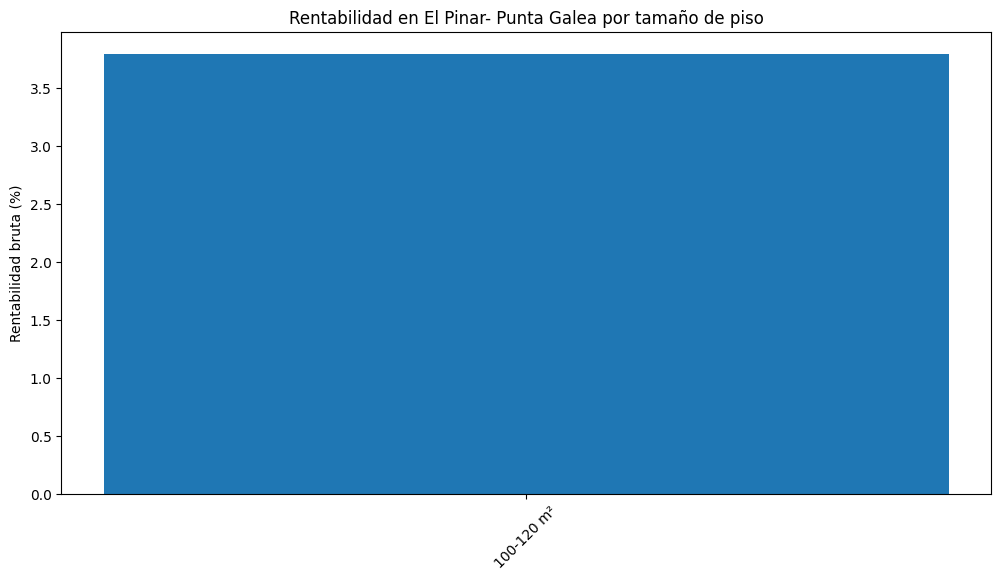

                    barrio               distrito  habitaciones  baños  \
158  El Pinar- Punta Galea  El Pinar- Punta Galea          3.00   2.00   

       rango_m2  compra_media  alquiler_medio  rentabilidad_bruta_%  
158  100-120 m²    569,000.00        1,800.00                  3.80  


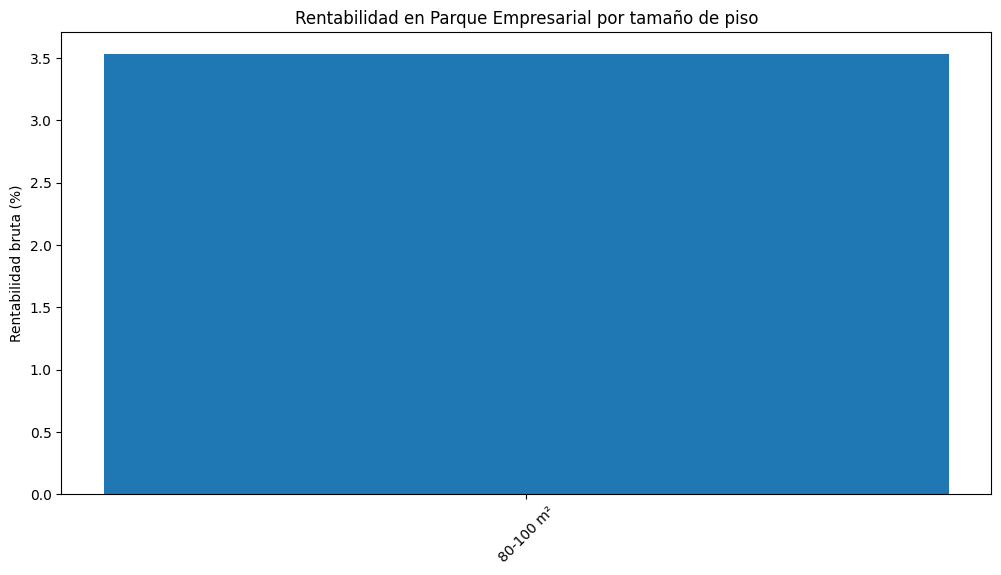

                 barrio            distrito  habitaciones  baños   rango_m2  \
328  Parque Empresarial  Parque Empresarial          2.00   2.00  80-100 m²   

     compra_media  alquiler_medio  rentabilidad_bruta_%  
328    509,750.00        1,500.00                  3.53  


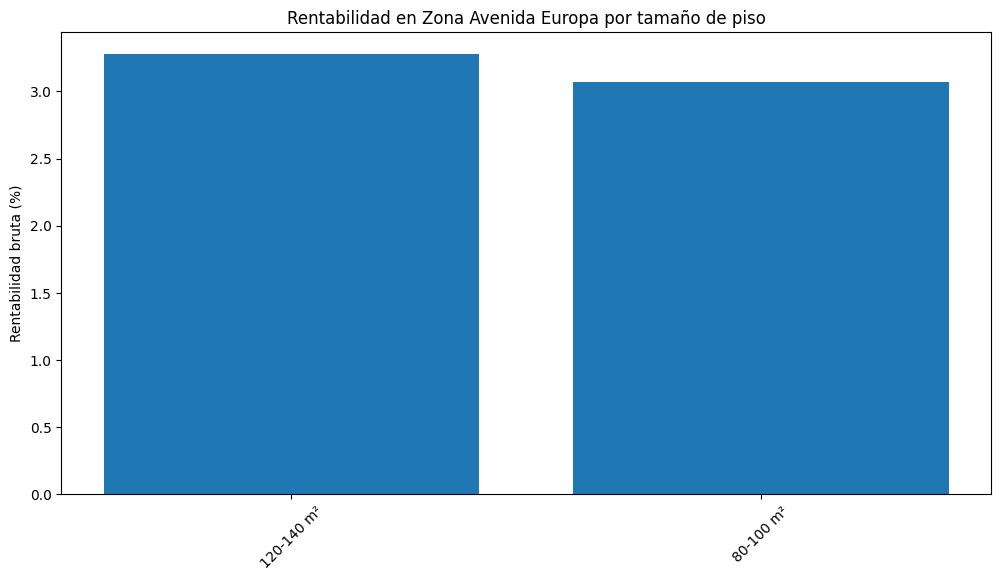

                  barrio             distrito  habitaciones  baños  \
407  Zona Avenida Europa  Zona Avenida Europa          3.00   2.00   
406  Zona Avenida Europa  Zona Avenida Europa          2.00   2.00   

       rango_m2  compra_media  alquiler_medio  rentabilidad_bruta_%  
407  120-140 m²  1,116,333.33        3,050.00                  3.28  
406   80-100 m²    654,857.14        1,675.00                  3.07  


In [274]:
distritos = rentabilidad["distrito"].unique()

# Crear un gráfico por distrito
for distrito in distritos:
    df_plot = rentabilidad[rentabilidad["distrito"] == distrito]
    
    plt.figure(figsize=(12,6))
    plt.bar(df_plot["rango_m2"], df_plot["rentabilidad_bruta_%"])
    plt.xticks(rotation=45)
    plt.ylabel("Rentabilidad bruta (%)")
    plt.title(f"Rentabilidad en {distrito} por tamaño de piso")
    plt.show()

    print(df_plot.head(10))  # ver top 20 más rentables